In [1]:
from algorithms.greedy_color import greedy_color
from utilities.data_functions import col_to_edge_list
from utilities.vis_helpers import plot_coloring
from algorithms.color_gcn import ColorGCN
import torch
import torch.optim as optim
from utilities.eval import dot_product_loss, count_collisions

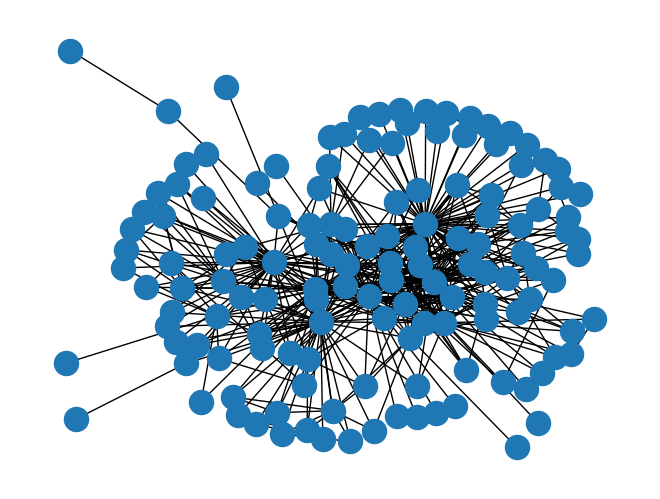

In [2]:
# Load and plot the graph

graph = 'anna.col'
n, edge_list, col_list = col_to_edge_list(f'data/input/COLOR/instances/{graph}')
plot_coloring(edge_list)

In [3]:
coloring = greedy_color(n, edge_list)
print(f'This produced a coloring with {count_collisions(coloring, edge_list)} coliisions and {max(coloring) + 1} colors')

This produced a coloring with 0.0 coliisions and 11 colors


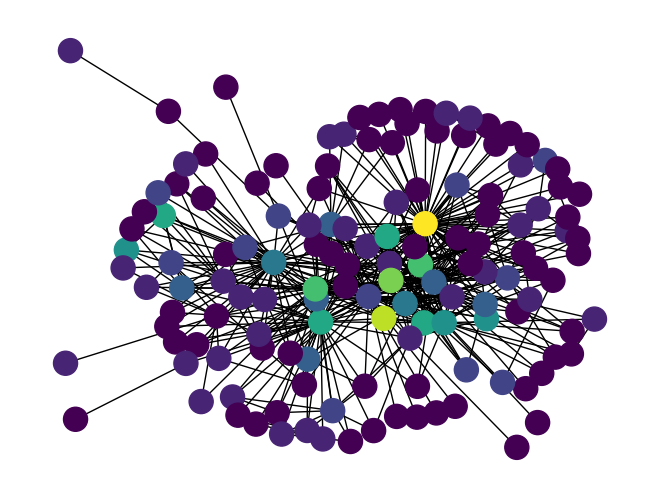

In [4]:
plot_coloring(edge_list, coloring)

0.0

In [27]:
def greedy_color(n, edge_list, shuffle=True):
    colors = [None]*n
    color_map = {0:[]}
    nodes = list(range(n))
    adj = to_dense_adj(edge_list).squeeze(0)
    latest_color = 0
    if shuffle:
        random.shuffle(nodes)
    for node in nodes:
        for color in color_map:
            feasible_color = True
            for colored_node in color_map[color]:
                if adj[node][colored_node] != 0:
                    feasible_color = False
                    break
            if feasible_color:
                color_map[color].append(node)
                colors[node] = color
                break
        else:
            latest_color += 1
            color_map[latest_color] = [node]
            colors[node] = latest_color
    return colors



